# Understanding Descriptive Statistics

Import the necessary libraries here:

In [6]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [33]:
# your code here

times = 10
def roll_the_dice(times):
    return random.choices(range(1,7), k=times)

dice_results = pd.DataFrame(roll_the_dice(times), columns=['Result'], index=range(1, times+1));
dice_results

,Result
1,2
2,3
3,6
4,2
5,4
6,6
7,1
8,5
9,1
10,2


#### 2.- Plot the results sorted by value.

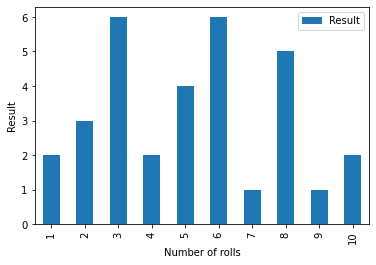

In [38]:
# your code here
dice_results.plot.bar()
plt.xlabel('Number of rolls')
plt.ylabel('Result')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

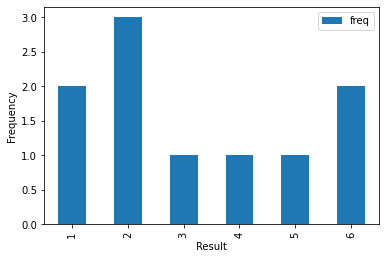

In [47]:
# your code here
freq = pd.DataFrame()
freq['freq'] = dice_results.groupby(['Result'])['Result'].count()
freq.plot.bar()
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.show()


In [ ]:
"""
In the first chart we can observed results of all rolls, so we see the distribution of results. 
In the second graph, on the other hand, the results are grouped, so we can observe how many times each result was obtained. 
I would say that this is an equivalent of a pivot Table where in Rows we have Result and in the values count of Rolls. 
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [48]:
# your code here
def mean_calc(result):
	'''This is a function that takes the list of results from rolling a dice and returns their mean'''
	sum_res = 0 
	for num in result: 
		sum_res += num
	return sum_res/len(result)

In [49]:
mean_calc(dice_results['Result'])

3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [74]:
# your code here

def mean_grouped(result):
	'''This function takes the list of results from rolling a dice and returns a grouped mean value. The results are grouped by the value on the dice'''
	#First I calculate frequency of each result
	dice = [1,2,3,4,5,6]
	freq = []
	for num in dice:
		if num in result:
			freq.append(result.count(num))
		else:
			freq.append(0)
	#Now I multiply frequency by the result, create a sum of that and divide it by the number of elemnts in result
	#This will give me gruped mean 
	sum_fr= 0
	for i in range(6):
		fr=freq[i]*dice[i]
		sum_fr +=fr
	return sum_fr/len(result)
	
	

In [75]:
list(dice_results['Result'])

[2, 3, 6, 2, 4, 6, 1, 5, 1, 2]

In [76]:
#Now I can calculate the grouped mean value for my case, but firstly I need to convert it to the list
results_list =  list(dice_results['Result'])
mean_grouped(results_list)

3.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [92]:
# your code here
def median_search(result):
	'''This function takes the list of results of a roll dice and returns the median'''
	#The median is equal to the medium value or the mean of two middle values depending if the list has even or odd  number of elements
	result.sort()
	if len(result)%2==0:
		median = (result[int(len(result)/2)] + result[int(len(result)/2)-1])/2 
	else: 
		median = result[int(len(result)/2)]
	return median


In [97]:
#Now I can check if the function works for my list 
results_list =  list(dice_results['Result'])
median_search(results_list)

2.5

In [98]:
#I will compare it with the build up function
dice_results['Result'].median()

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [110]:
# your code here
def quartiles_finder(result):
	'''This is a function that takes the list and returns the four quartile values'''
	result.sort()
	#the first and third quartile will be a number or a mean depending if the list has even or odd
	#for the second quartile I need to find the first half of the results and calculate it median
	mid1=result[:int(len(result)/2)]
	q1 = median_search(mid1)

	#Second quartile is equal to median
	q2=median_search(result)

	#Third quartile is the median of the second half
	mid2=result[int(len(result)/2):]
	q3=median_search(mid2)

	#Fourth quartile is the max value 
	q4=result[-1]

	q_values = [q1,q2,q3,q4]
	
	return q_values



In [111]:
#Now I will try it for my results
results_list =  list(dice_results['Result'])
quartiles_finder(results_list)

[2, 2.5, 5, 6]

In [112]:
#I will check if these are for sure good values by comparison to result of buid in function
dice_results['Result'].describe()

count    10.000000
mean      3.200000
std       1.932184
min       1.000000
25%       2.000000
50%       2.500000
75%       4.750000
max       6.000000
Name: Result, dtype: float64

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [113]:
# your code here
roll_dice = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week4\Day3\Lab04\roll_the_dice_hundred.csv')

In [140]:
roll_dice.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [121]:
sorted_roll = roll_dice.sort_values(['value'])

<AxesSubplot:>

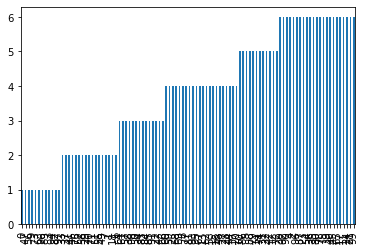

In [130]:
sorted_roll['value'].plot.bar()


In [ ]:
"""
I see a stairs shaped like graph, where the lenght of each step correspond to the number of times the value was rolled.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [131]:
# your code here
mean_calc(roll_dice['value'])

3.74

In [132]:
#I can also do that using the second function
results_list =  list(roll_dice['value'])
mean_grouped(results_list)

3.74

#### 3.- Now, calculate the frequency distribution.


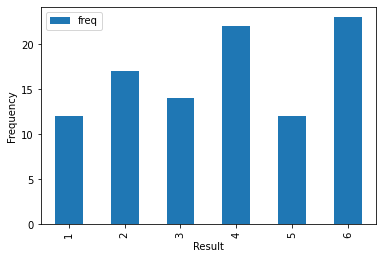

In [134]:
# your code here
freq_100 = pd.DataFrame()
freq_100['freq'] = roll_dice.groupby(['value'])['value'].count()
freq_100.plot.bar()
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.show()

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

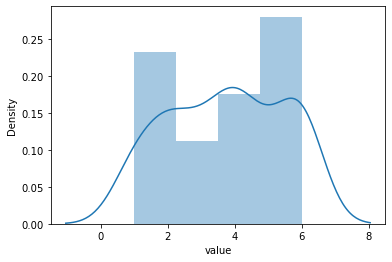

In [138]:
# your code here
#Firstly I will try to use seaborn display function
sns.distplot(roll_dice['value'])

<AxesSubplot:>

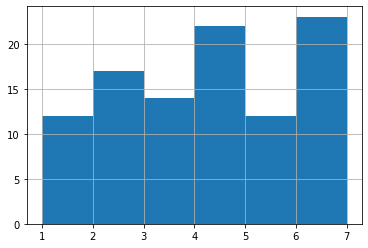

In [149]:
roll_dice['value'].hist(bins=[1,2,3,4,5,6,7])

In [137]:
roll_dice['value'].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

In [ ]:
"""
I see from that graph that the most rolled out value was 6 then 5 and then 2. The mean value is slightly below 4. Which is logical, as mean should be close to the center (in our case to the 3,5), but in our case there is the highest numer of values 6, so the mean shifts toward the right side.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [142]:
# your code here
roll_thusand = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week4\Day3\Lab04\roll_the_dice_thousand.csv')

In [143]:
roll_thusand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


In [144]:
#I calculate the mean
mean_calc(roll_thusand['value'])

3.447

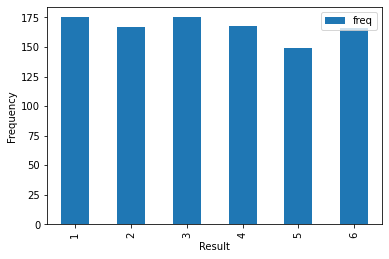

In [146]:
#Now I create the histogram 
freq_100 = pd.DataFrame()
freq_100['freq'] = roll_thusand.groupby(['value'])['value'].count()
freq_100.plot.bar()
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

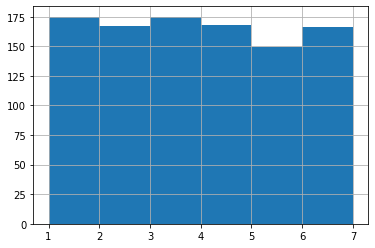

In [150]:
roll_thusand['value'].hist(bins=[1,2,3,4,5,6,7])

In [148]:
roll_thusand['value'].value_counts()

1    175
3    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

In [ ]:
"""
With larger number of rolls the mean is closer to the center (3.5) and the values are more evenly distributed
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [153]:
# your code here
ages = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week4\Day3\Lab04\ages_population.csv')
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


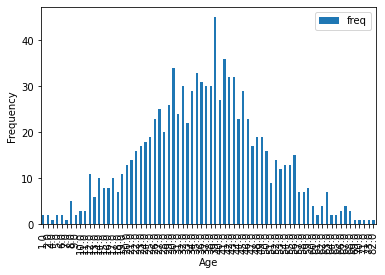

In [160]:
freq = pd.DataFrame()
freq['freq'] = ages.groupby(['observation'])['observation'].count()
freq.plot.bar()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

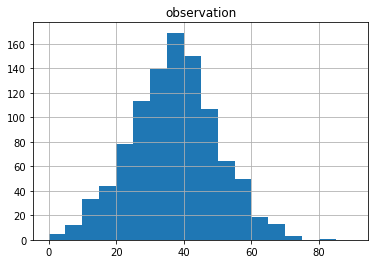

In [175]:
ages.hist(bins=range(0,91,5))

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

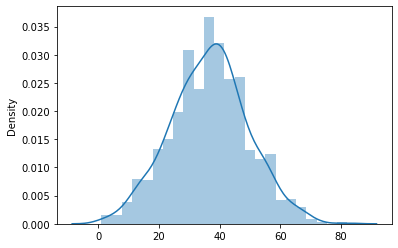

In [154]:
sns.distplot(ages)

In [ ]:
#I guess that the mean will be a little below 40 , close to the mode (the highest bar) as the distribution is close to the normal distribution. When it comes to the satndard devaition I suppose it also won't be to far from the center. I'm guessing it can be around 15.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [155]:
# your code here
ages.mean()

observation    36.56
dtype: float64

In [156]:
ages.std()

observation    12.8165
dtype: float64

In [ ]:
"""
My both guesses were more or less correct. The data has a normal distribution, thus mean is below 40, clese to the mode and the standard deviation is also not very far from the mean.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [157]:
# your code here
ages2 = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week4\Day3\Lab04\ages_population2.csv')
ages2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


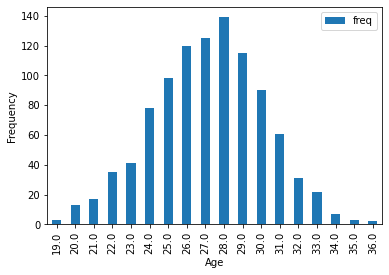

In [158]:
freq = pd.DataFrame()
freq['freq'] = ages2.groupby(['observation'])['observation'].count()
freq.plot.bar()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

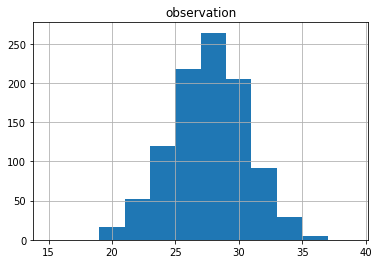

In [173]:
ages2.hist(bins=range(15,41,2))

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

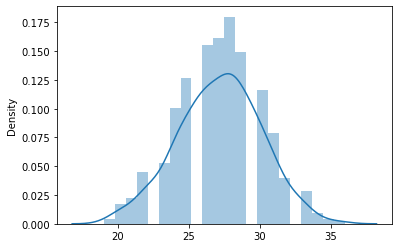

In [159]:
sns.distplot(ages2)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Firstly the observations in the second case were done on a younger sample. The range was also much smaller. Nevertheless, the distribution is also close to normal with the mean close to 27-28, similar as the mode
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [161]:
# your code here
ages2.mean()

observation    27.155
dtype: float64

In [163]:
ages2.std()

observation    2.969814
dtype: float64

In [ ]:
"""
As I mentioned above the observations were done on a younger sample as well as on a smaller range of ages. This resulted in the lower mean value and much lower standard deviation. However, the both cases have a similar distribution close to normal. 
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [152]:
# your code here
ages3 = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week4\Day3\Lab04\ages_population3.csv')
ages3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


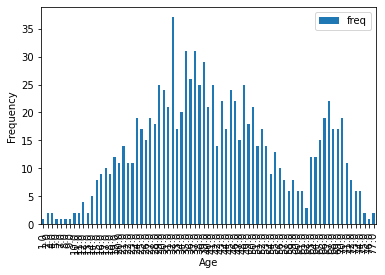

In [164]:
freq = pd.DataFrame()
freq['freq'] = ages3.groupby(['observation'])['observation'].count()
freq.plot.bar()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

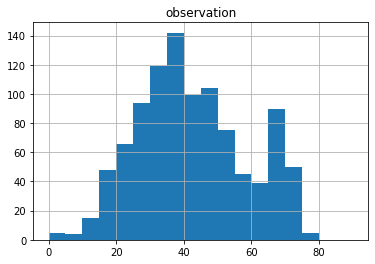

In [176]:
ages3.hist(bins=range(0,91,5))

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

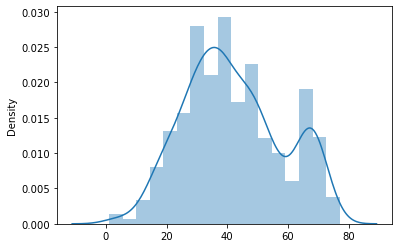

In [165]:
sns.distplot(ages3)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [177]:
# your code here
ages3.mean()

observation    41.989
dtype: float64

In [178]:
ages3.std()

observation    16.144706
dtype: float64

In [ ]:
"""
Here, the mean value is slightly above the mode (the highest bar), it is caused by the large number of observations around the age of 70, which shifts mean to the right. 
In terms of standard deviation it is at the level of ca. 16 which I would say is a little high (caused by the same effect as for the mean)
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [179]:
# your code here
#the quartiles can be displayed using describe function
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
Median is equal to 40 it is lower then mean and higher than the mode, thus as expected the distribution is right skewed. The standard deviation is farther from the mean then the values of lower and upper quartile, which mean that data are far from the cetral value.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [188]:
# your code here
#I will look for the precentile that correspond ot the mean +- standard deviation, thus around 26 and 58

ages3.quantile(0.16)

observation    26.0
Name: 0.16, dtype: float64

In [186]:
ages3.quantile(0.805)

observation    58.0
Name: 0.805, dtype: float64

In [ ]:
"""
The found percetiles were equal to  0.16 and 0.81, which proves that the values which are higher from the mean then the standard deviation contribute only to ca.16 % for the lower percentile. This proves that the values are far from the center.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [192]:
# your code here
ages['nb']= 1
ages2['nb']=2
ages3['nb']=3

all_ages=pd.concat((ages,ages2,ages3), axis=0)

In [193]:
all_ages.head()

,observation,nb
0,68.0,1
1,12.0,1
2,45.0,1
3,38.0,1
4,49.0,1


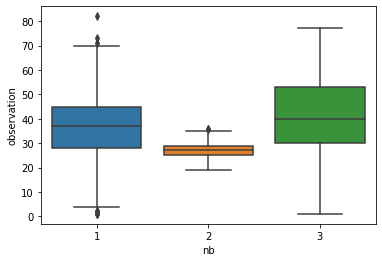

In [194]:
#First, I look at the staistics for all three neigbourhoods
ax = sns.boxplot(x="nb", y="observation", data=all_ages)

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\radek\Anaconda3\lib\site-pack

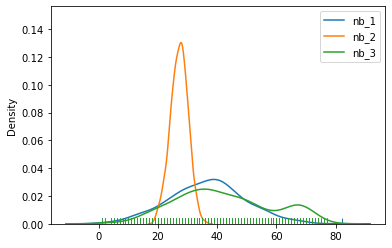

In [201]:
#Now I compare their distributions
sns.distplot(ages[['observation']], hist=False, rug=True, label='nb_1')
sns.distplot(ages2[['observation']], hist=False, rug=True, label='nb_2')
sns.distplot(ages3[['observation']], hist=False, rug=True, label='nb_3')
plt.legend()
plt.show()

In [ ]:
"""
From the first graph (summarizing basic statistics), I can see that neighbourhood 1 and 3 are quite simialr. They have range and the mean at similar level. The neighbourhood 2 has lower mean, which suggest that younger people live there. 
While looking at the graph 2, which compares 3 distributions, the similar conclusion may be formed. Nighbourhood 2 has a large pick of young people (without kids), it may be thus university campus. The other two neighbourhoods are similar. Their distribution is almost identical, but neigbourhood 3 has larger amount of older people around 70. This may suggets that in That neighbourhood is located for example a house, which takes care of older people. 
"""